In [14]:
import math

import numpy as np
from tqdm import tqdm

dataset_name = 'ml_small'
# dataset_name = 'ml_25m'

# Load the matrix
M = np.load('{}.npy'.format(dataset_name))

# Shuffle and split
np.random.shuffle(M)
nnz_count = M.shape[0]
row_count = int(M[:, 0].max() + 1)
col_count = int(M[:, 1].max() + 1)

training_count = round(nnz_count * 0.8)
test_count = nnz_count - training_count

M_train = M[:training_count, :]
M_test = M[training_count:, :]

In [15]:
def compute_err(M):
    nnz = M.shape[0]
    
    rmse = 0
    sse = 0
    
    for i in range(nnz):
        row, col, rating = M[i]
        row = int(row)
        col = int(col)
        
        estimate = P[row].dot(Q[col])
        error = rating - estimate
        rmse += error ** 2
    
    rmse = math.sqrt(rmse / nnz)
    return rmse

In [16]:
f = 16 # Factor size

P = np.random.uniform(size=(row_count, f))
Q = np.random.uniform(size=(col_count, f))

iteration_count = 80
learning_rate = 0.003
regularization_param = 0.01

In [17]:
train_error = compute_err(M_train)
test_error = compute_err(M_test)

train_error_lst = []
test_error_lst = []
train_error_lst.append(train_error)
test_error_lst.append(test_error)

print(train_error, test_error)

for i in tqdm(range(iteration_count)):
    np.random.shuffle(M_train)
    train_rmse = 0
    
    for j in range(training_count):
        row, col, rating = M_train[j]
        row = int(row)
        col = int(col)
    
        estimate = P[row].dot(Q[col])
        error = rating - estimate
        
        temp = np.copy(P[row])
        P[row] += learning_rate * (error * Q[col] - regularization_param * P[row])
        Q[col] += learning_rate * (error * temp - regularization_param * Q[col])
        
        train_rmse += error ** 2
        
    train_error = math.sqrt(train_rmse / training_count)
    test_error = compute_err(M_test)
    train_error_lst.append(train_error)
    test_error_lst.append(test_error)

    print(train_error, test_error)

  0%|          | 0/80 [00:00<?, ?it/s]

1.4384646248268025 1.441974766030265


  1%|▏         | 1/80 [00:01<01:58,  1.50s/it]

1.1298433480140657 1.0474475907979128


  2%|▎         | 2/80 [00:03<01:57,  1.51s/it]

0.9990125001537681 0.9980462958874979


  4%|▍         | 3/80 [00:04<01:56,  1.52s/it]

0.952774693909292 0.9736118325683923


  5%|▌         | 4/80 [00:06<01:55,  1.53s/it]

0.9245142340268466 0.9579863783917931


  6%|▋         | 5/80 [00:07<01:53,  1.52s/it]

0.9044381280454131 0.9467834746672289


  8%|▊         | 6/80 [00:09<01:52,  1.52s/it]

0.8890168976260484 0.9392606408933681


  9%|▉         | 7/80 [00:10<01:49,  1.50s/it]

0.8766404196062848 0.9328960493459881


 10%|█         | 8/80 [00:12<01:47,  1.50s/it]

0.8661736753612036 0.928419380016621


 11%|█▏        | 9/80 [00:13<01:46,  1.49s/it]

0.8571739977713534 0.9251036349066081


 12%|█▎        | 10/80 [00:15<01:44,  1.49s/it]

0.8493903981174189 0.9220059976344033


 14%|█▍        | 11/80 [00:16<01:42,  1.49s/it]

0.8422983083800268 0.9189397625709331


 15%|█▌        | 12/80 [00:18<01:41,  1.49s/it]

0.8359245362845167 0.9167968415750458


 16%|█▋        | 13/80 [00:19<01:39,  1.48s/it]

0.8302099892628578 0.9144781939167709


 18%|█▊        | 14/80 [00:20<01:37,  1.48s/it]

0.8247230315153011 0.9138176403932969


 19%|█▉        | 15/80 [00:22<01:36,  1.48s/it]

0.8195435849899554 0.9126860501838392


 20%|██        | 16/80 [00:23<01:34,  1.48s/it]

0.8148272758946025 0.9116704917624444


 21%|██▏       | 17/80 [00:25<01:34,  1.50s/it]

0.8103733289357957 0.911231790732713


 22%|██▎       | 18/80 [00:26<01:32,  1.49s/it]

0.805859810580049 0.9105607871871298


 24%|██▍       | 19/80 [00:28<01:30,  1.48s/it]

0.8015799142984837 0.90953207013091


 25%|██▌       | 20/80 [00:29<01:28,  1.48s/it]

0.7975838316151505 0.9099760617561273


 26%|██▋       | 21/80 [00:31<01:27,  1.48s/it]

0.7936459138089957 0.9103201436035429


 28%|██▊       | 22/80 [00:32<01:25,  1.48s/it]

0.7896371747477734 0.9094090908086316


 29%|██▉       | 23/80 [00:34<01:24,  1.48s/it]

0.7857367034128495 0.9087809381286943


 30%|███       | 24/80 [00:35<01:22,  1.48s/it]

0.7818539760319353 0.9088615163081377


 31%|███▏      | 25/80 [00:37<01:21,  1.48s/it]

0.7781434105186618 0.9091282373878721


 32%|███▎      | 26/80 [00:38<01:19,  1.48s/it]

0.7743506326906863 0.908881717043941


 34%|███▍      | 27/80 [00:40<01:18,  1.48s/it]

0.7708560797944719 0.9103797096471578


 35%|███▌      | 28/80 [00:41<01:17,  1.49s/it]

0.7671850303468988 0.9099071532026858


 36%|███▋      | 29/80 [00:43<01:15,  1.49s/it]

0.7636504508021529 0.9098305875343274


 38%|███▊      | 30/80 [00:44<01:14,  1.49s/it]

0.7598614303814738 0.910592800992671


 39%|███▉      | 31/80 [00:46<01:12,  1.49s/it]

0.756213294419455 0.9108758158994597


 40%|████      | 32/80 [00:47<01:11,  1.48s/it]

0.7525191345394834 0.9113781834264797


 41%|████▏     | 33/80 [00:49<01:09,  1.48s/it]

0.7490259026562129 0.9117673098488459


 42%|████▎     | 34/80 [00:50<01:08,  1.48s/it]

0.7453413807394524 0.9120986793104686


 44%|████▍     | 35/80 [00:52<01:06,  1.48s/it]

0.7417769207703432 0.9129833060315131


 45%|████▌     | 36/80 [00:53<01:05,  1.48s/it]

0.7382698976760766 0.9139891863157636


 46%|████▋     | 37/80 [00:55<01:04,  1.50s/it]

0.7344943030678515 0.9134325059853665


 48%|████▊     | 38/80 [00:56<01:03,  1.52s/it]

0.7310361773245123 0.9146949904719076


 49%|████▉     | 39/80 [00:58<01:01,  1.51s/it]

0.7273683754220949 0.914783538377426


 50%|█████     | 40/80 [00:59<00:59,  1.50s/it]

0.7236741666089285 0.9156285317020243


 51%|█████▏    | 41/80 [01:01<00:58,  1.49s/it]

0.7200192385884028 0.9167589892313706


 52%|█████▎    | 42/80 [01:02<00:56,  1.50s/it]

0.7165890796948362 0.9170291235019834


 54%|█████▍    | 43/80 [01:04<00:55,  1.49s/it]

0.7128902037159214 0.9185451902564051


 55%|█████▌    | 44/80 [01:05<00:53,  1.50s/it]

0.7092393071663903 0.9184246725824315


 56%|█████▋    | 45/80 [01:07<00:52,  1.50s/it]

0.7057710049402502 0.9198976818014657


 57%|█████▊    | 46/80 [01:08<00:50,  1.50s/it]

0.7023137975175423 0.9205197434811401


 59%|█████▉    | 47/80 [01:10<00:49,  1.50s/it]

0.6986777266623048 0.9216215846957333


 60%|██████    | 48/80 [01:11<00:48,  1.51s/it]

0.6950435041090482 0.9219144455674763


 61%|██████▏   | 49/80 [01:13<00:46,  1.50s/it]

0.6915104151470978 0.9237946222734401


 62%|██████▎   | 50/80 [01:14<00:45,  1.51s/it]

0.6881016556545536 0.9241402053350624


 64%|██████▍   | 51/80 [01:16<00:43,  1.51s/it]

0.6847931275212579 0.9245353038520641


 65%|██████▌   | 52/80 [01:17<00:42,  1.51s/it]

0.681243579432631 0.9259175434800679


 66%|██████▋   | 53/80 [01:19<00:40,  1.50s/it]

0.677904805125858 0.9264427599793812


 68%|██████▊   | 54/80 [01:20<00:39,  1.50s/it]

0.6745115988547358 0.9270428461873391


 69%|██████▉   | 55/80 [01:22<00:37,  1.50s/it]

0.6711701983543072 0.92787095823207


 70%|███████   | 56/80 [01:23<00:35,  1.50s/it]

0.667873106039584 0.9290024063433234


 71%|███████▏  | 57/80 [01:25<00:34,  1.50s/it]

0.6646157454304655 0.9296690789987084


 72%|███████▎  | 58/80 [01:26<00:32,  1.50s/it]

0.6614510128433825 0.9302348535943801


 74%|███████▍  | 59/80 [01:28<00:31,  1.49s/it]

0.6581666096057115 0.9315692966060286


 75%|███████▌  | 60/80 [01:29<00:29,  1.49s/it]

0.6549599304033719 0.9324572832154658


 76%|███████▋  | 61/80 [01:31<00:28,  1.49s/it]

0.6518691519245331 0.9336993862321779


 78%|███████▊  | 62/80 [01:32<00:26,  1.50s/it]

0.6488251016835139 0.9344994006460803


 79%|███████▉  | 63/80 [01:34<00:25,  1.52s/it]

0.6456848778640046 0.9359049539124595


 80%|████████  | 64/80 [01:35<00:24,  1.51s/it]

0.6427751630572468 0.9361098563320586


 81%|████████▏ | 65/80 [01:37<00:22,  1.50s/it]

0.6397052973994327 0.937085892754213


 82%|████████▎ | 66/80 [01:38<00:20,  1.49s/it]

0.6367612414012684 0.9382046235833523


 84%|████████▍ | 67/80 [01:40<00:19,  1.49s/it]

0.6338687859943607 0.9390193183877088


 85%|████████▌ | 68/80 [01:41<00:17,  1.49s/it]

0.6309081187162877 0.9394131741227342


 86%|████████▋ | 69/80 [01:43<00:16,  1.49s/it]

0.6282782347325311 0.9400140261527832


 88%|████████▊ | 70/80 [01:44<00:14,  1.49s/it]

0.6254379437528558 0.9410735550435592


 89%|████████▉ | 71/80 [01:46<00:13,  1.49s/it]

0.6226417167035694 0.9424606590591839


 90%|█████████ | 72/80 [01:47<00:11,  1.49s/it]

0.61998186373488 0.9440562568018706


 91%|█████████▏| 73/80 [01:49<00:10,  1.49s/it]

0.6172643504150155 0.9434862932459682


 92%|█████████▎| 74/80 [01:50<00:08,  1.49s/it]

0.6147674599703283 0.9448940958765039


 94%|█████████▍| 75/80 [01:52<00:07,  1.49s/it]

0.6120462786927013 0.945005081269148


 95%|█████████▌| 76/80 [01:53<00:05,  1.49s/it]

0.6094960077225199 0.9464213512441709


 96%|█████████▋| 77/80 [01:55<00:04,  1.49s/it]

0.607153143154612 0.9475195571667374


 98%|█████████▊| 78/80 [01:56<00:02,  1.49s/it]

0.6045885894251009 0.948016195906955


 99%|█████████▉| 79/80 [01:58<00:01,  1.49s/it]

0.6021504080856901 0.9491982903450231


100%|██████████| 80/80 [01:59<00:00,  1.49s/it]

0.5998219842424664 0.9499689972222571


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
sns.set_style("whitegrid")

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

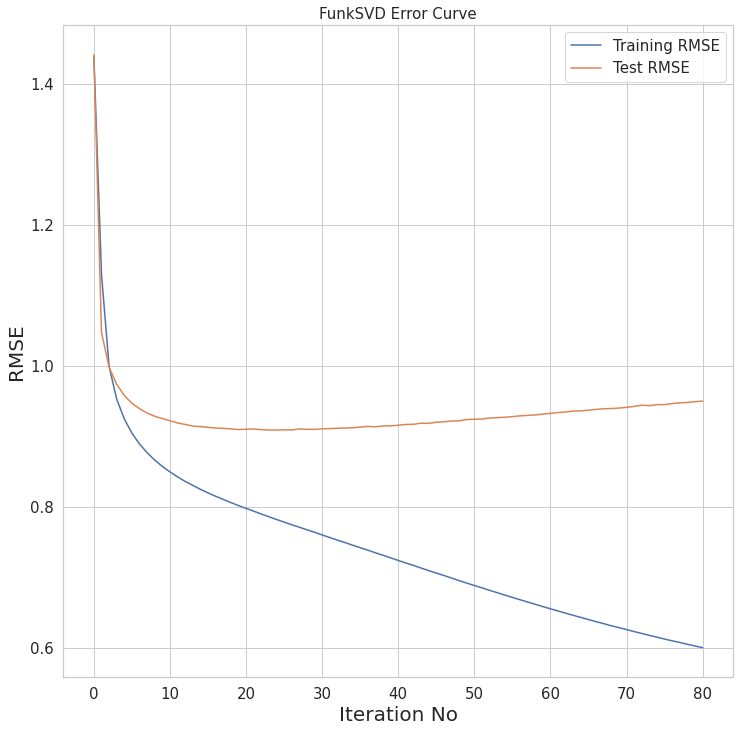

In [19]:
plt.plot(np.arange(len(train_error_lst)), train_error_lst, label='Training RMSE')
plt.plot(np.arange(len(train_error_lst)), test_error_lst, label='Test RMSE')

plt.xlabel('Iteration No')
plt.ylabel('RMSE')
plt.title('FunkSVD Error Curve')

plt.legend()
plt.show()